# This is the implementation of Cupcake design fro UX Researcher Agent with IBM Granite Model

For more details please refer to this [blog here](https://medium.com/@khan.rafflesia/building-a-ux-researcher-agent-with-ibm-granite-model-f071ab73d793)

### What is a UX Researcher Agent?

A UX Researcher Agent is an AI-driven system designed to autonomously evaluate user interface (UI) designs and deliver structured insights focused on usability, accessibility, clarity, and visual hierarchy. Using advanced vision and reasoning models, the agent swiftly analyzes visual elements, detects UX issues, and generates actionable recommendations in real-time.

The UX Researcher Agent evaluates designs based on:

- Usability: How intuitive and efficient is the design?
- Accessibility: Does the design cater effectively to all users, including those with special needs?
- Clarity: Is the interface clear, understandable, and intuitive?
Visual
- Hierarchy: How effectively does the design guide and manage users’ attention?

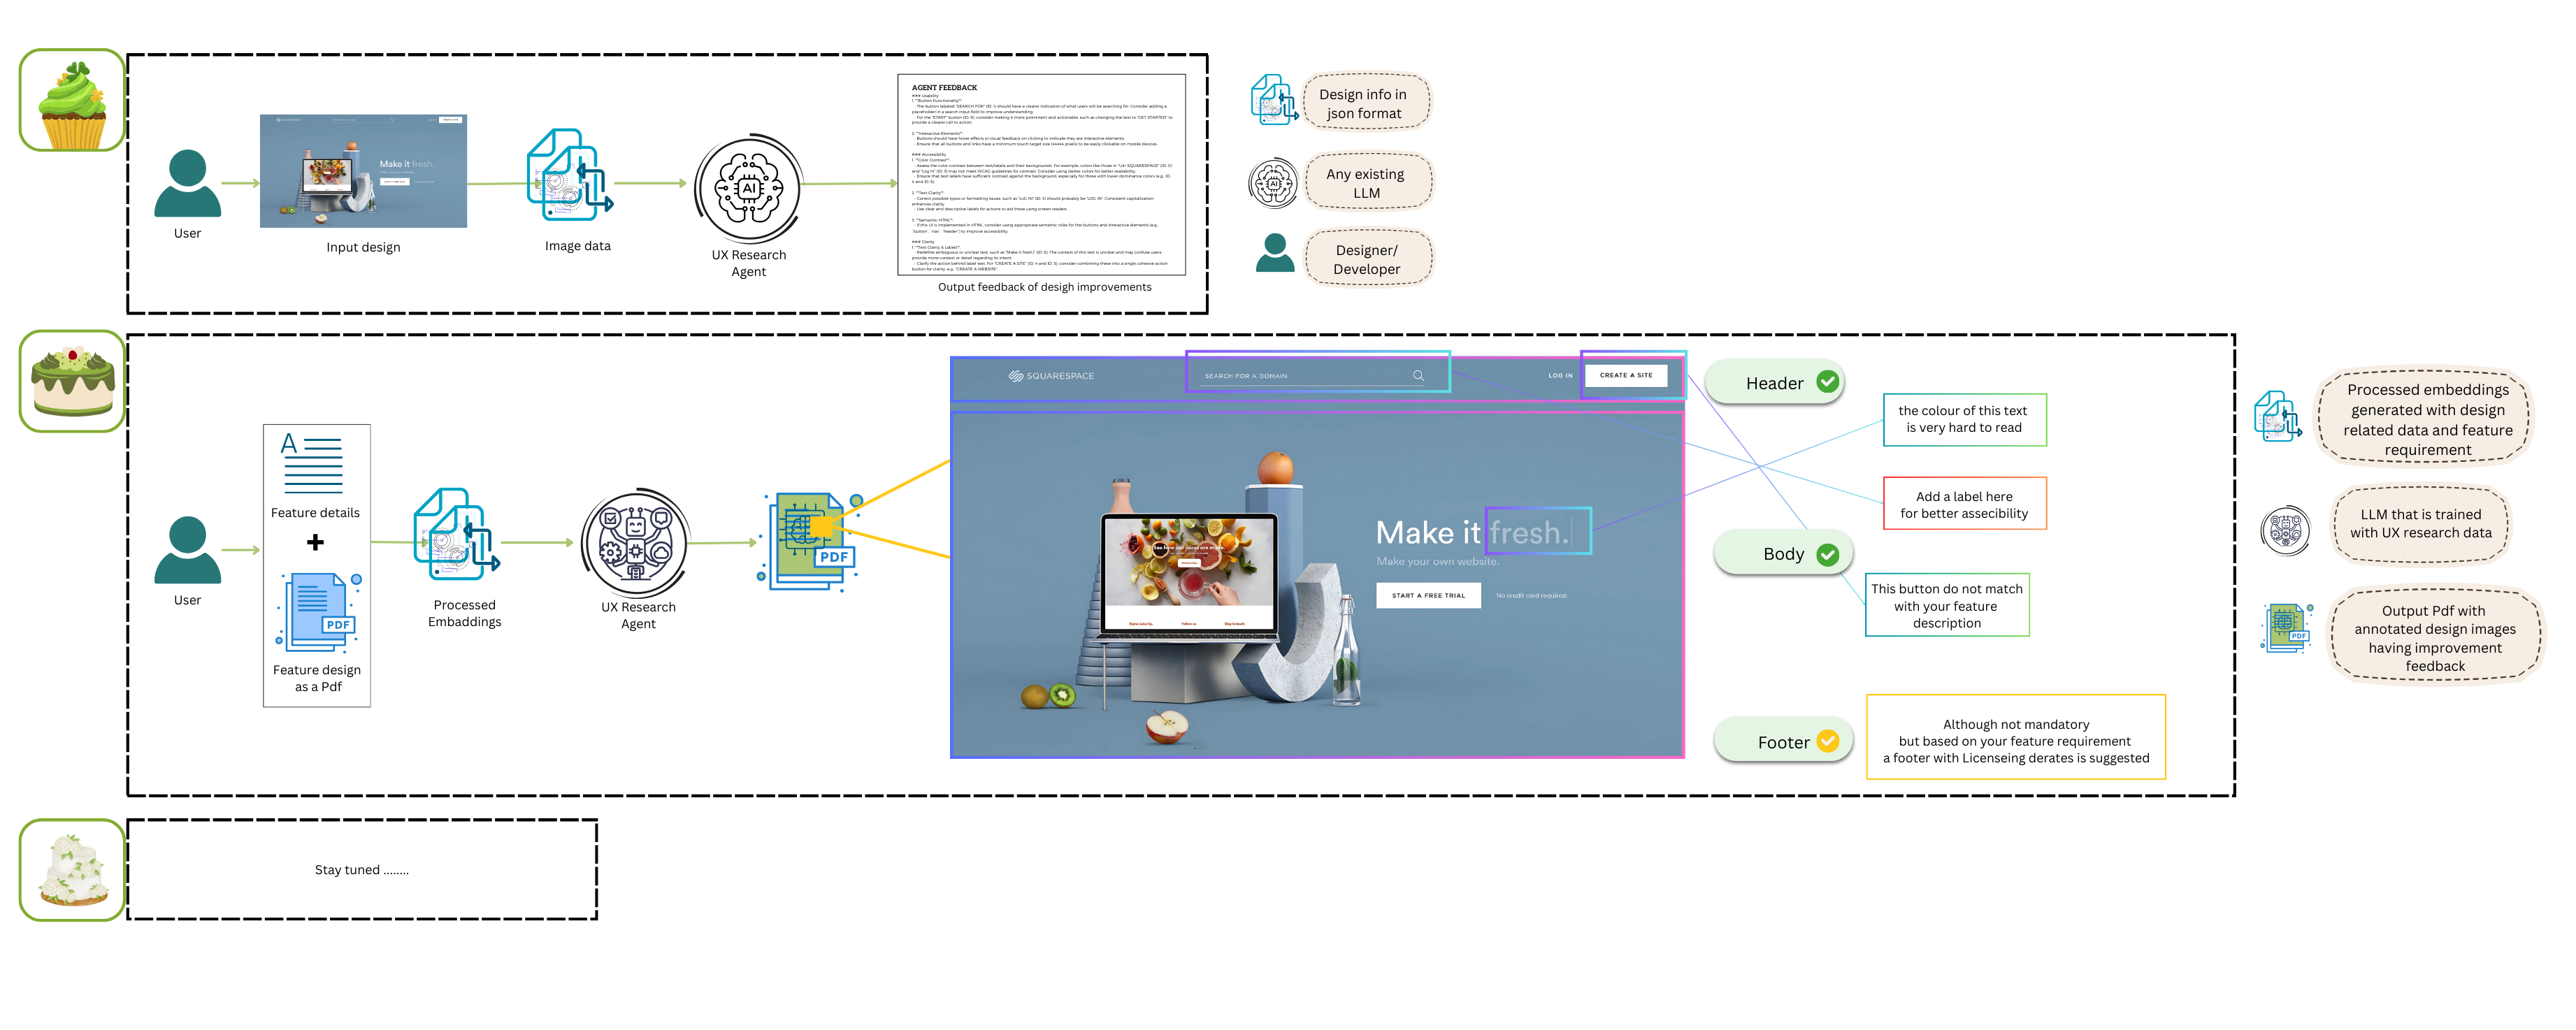

### Step 1: Installation
Run the following commands in your notebook environment or terminal to set up your environment:

This installs all necessary libraries:

- ollama: Interface to the Granite models
- gradio: For building the web interface
- pillow: For image processing
- easyocr: For text recognition in images
- opencv-python: For computer vision tasks
- numpy: For numerical operations
- requests: For handling HTTP requests

In [ ]:
!pip install ollama gradio pillow easyocr opencv-python numpy requests

### Step 2: Ensure Granite model setup
Pull the Granite models using Ollama:

```bash
!ollama pull granite3.2:8b
!ollama pull granite3.2-vision
```

These commands pull the Granite models from Ollama:

granite3.2:8b: The base language model (8 billion parameters)
granite3.2-vision: The vision model for analyzing images

In [ ]:
!ollama pull granite3.2:8b

In [ ]:
!ollama pull granite3.2-vision

### Step 3: Import Libraries

Imports the required libraries for the application.

In [ ]:
import requests
import ollama
import gradio as gr
import json
import base64
from PIL import Image

### Step 4: Preprocessing & UX Analysis using Granite Vision Model

This encode_image helper function fetches an image from a URL and encodes it in base64 for the vision model.

This preprocess_and_analyze_ux function takes an image, processes it, and sends it to the Granite model for UX analysis.

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

def preprocess_and_analyze_ux(image):
    image_path = "uploaded_image.png"
    image.save(image_path)
    base64_image = encode_image(image_path)

    vision_prompt = """
    Analyze the provided UI screenshot and list all UI components with detailed descriptions.
    For each component, provide:
    - Type (e.g., Button, Header, Footer, Textbox, Label)
    - Text label (if any)
    - Position on the screen (top-left, top-right, center, bottom-left, bottom-right)
    - Dominant color
    - Visibility (clearly visible or obstructed)

    Provide your response as structured JSON.
    """

    response = ollama.chat(
        model="granite3.2-vision",
        messages=[{"role": "user", "content": vision_prompt, "images": [base64_image]}]
    )
    ui_components = json.loads(response['message']['content'])

    analysis_prompt = (
        "Given the following structured UI components extracted from a screenshot, provide UX feedback "
        "with suggestions for improvement, focusing on usability, accessibility, clarity, and visual hierarchy:\n\n"
        f"{json.dumps(ui_components, indent=2)}"
    )

    feedback_response = ollama.chat(
        model="granite3.2:8b",
        messages=[{"role": "user", "content": analysis_prompt}]
    )

    return feedback_response['message']['content']

### Step 5: UX Analysis User Interface with Gradio

This creates a Gradio web interface where users can:

- Upload a UI image
- Submit it for analysis
- Receive UX feedback from the Granite model

The interface includes a title and description explaining its purpose.

In [ ]:
iface = gr.Interface(
    fn=preprocess_and_analyze_ux,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="UX Analysis Agent (Granite Model)",
    description="Upload an image and click 'Submit' to generate UX feedback using Granite models."
)

iface.launch(share=True)